In [13]:
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip Dataset.zip

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Archive:  Dataset.zip
replace DevanagariHandwrittenCharacterDataset/Test/character_10_yna/10544.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                  

<ipython-input-9-bffc6afb848c>:116: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  res=model.fit_generator(


Epoch 1/25
2444/2444 [==============================] - 115s 46ms/step - loss: 0.7907 - accuracy: 0.7804 - val_loss: 0.1768 - val_accuracy: 0.9431
Epoch 2/25
2444/2444 [==============================] - 107s 44ms/step - loss: 0.2904 - accuracy: 0.9102 - val_loss: 0.1043 - val_accuracy: 0.9683
Epoch 3/25
2444/2444 [==============================] - 106s 43ms/step - loss: 0.2262 - accuracy: 0.9294 - val_loss: 0.0886 - val_accuracy: 0.9716
Epoch 4/25
2444/2444 [==============================] - 107s 44ms/step - loss: 0.1926 - accuracy: 0.9400 - val_loss: 0.0693 - val_accuracy: 0.9796
Epoch 5/25
2444/2444 [==============================] - 107s 44ms/step - loss: 0.1687 - accuracy: 0.9472 - val_loss: 0.2155 - val_accuracy: 0.9344
Epoch 6/25
2444/2444 [==============================] - 106s 43ms/step - loss: 0.1556 - accuracy: 0.9515 - val_loss: 0.0914 - val_accuracy: 0.9717
Epoch 7/25
2444/2444 [==============================] - 106s 43ms/step - loss: 0.1430 - accuracy: 0.9555 - val_loss: 0

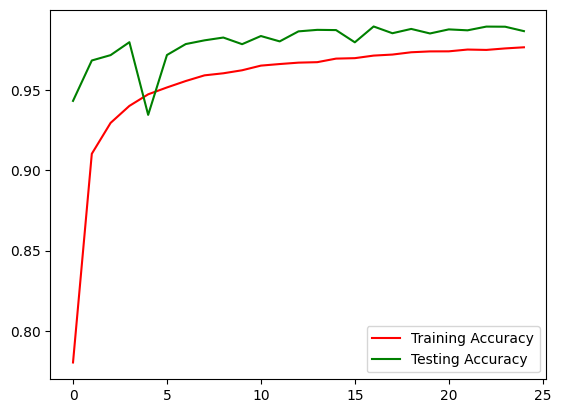

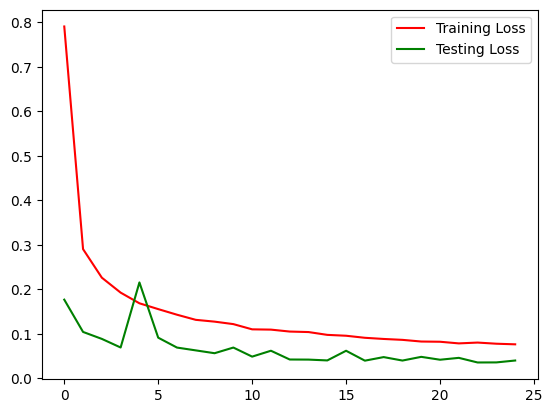

In [9]:

trainDataGen = ImageDataGenerator(
		rotation_range = 5,
		width_shift_range = 0.1,
		height_shift_range = 0.1,
		rescale = 1.0/255,
		shear_range = 0.2,
		zoom_range = 0.2,
		horizontal_flip = False,
		fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
trainGenerator = trainDataGen.flow_from_directory(
			"DevanagariHandwrittenCharacterDataset/Train",
			target_size = (32,32),
			batch_size = 32,
			color_mode = "grayscale",
			class_mode = "categorical")
prev = ""
labels = ["ka","kha","ga","gha","kna","cha","chha","ja","jha","yna","t`a","t`ha","d`a","d`ha","adna","ta","tha","da","dha","na","pa","pha","ba","bha","ma","yaw","ra","la","waw","sha","shat","sa","ha","aksha","tra","gya","0","1","2","3","4","5","6","7","8","9"]
count = 0;

validation_generator = test_datagen.flow_from_directory(
			"DevanagariHandwrittenCharacterDataset/Test",
			target_size=(32,32),
			batch_size=32,
			color_mode = "grayscale",
			class_mode= 'categorical')

model = Sequential()

#Layer1----------------------------------------------------------
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))

model.add(BatchNormalization())
#model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

#Layer2-------------------------------------------------------------
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))
model.add(BatchNormalization())
#model.add(MaxPooling2D())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))
#model.add(Dropout(0.25))


#Layers 3-----------------------------------------------------------
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))


#Layer 4--------------------------------------------------
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides= 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

#model.add(Dropout(0.2))


#Layer 5------------------------------------------------------------
'''model.add(Convolution2D(filters = 64,
			kernel_size = (2,2),
			strides= 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

'''

model.add(Flatten())

model.add(Dense(128,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())

model.add(Dense(64,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())

model.add(Dense(46,
		activation = "softmax",
		kernel_initializer = "uniform"))

model.compile(optimizer = "adam",
		loss = "categorical_crossentropy",
		metrics = ["accuracy"])

print(model.summary())

res=model.fit_generator(
		trainGenerator,
		epochs = 5,
		steps_per_epoch = 2444,
		validation_data = validation_generator,
		validation_steps = 432
		)

%matplotlib inline
accu=res.history['accuracy']
val_acc=res.history['val_accuracy']
loss=res.history['loss']
val_loss=res.history['val_loss']

epochs=range(len(accu)) #No. of epochs

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

model.save("HindiModel2.h5")

In [12]:
import cv2
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("HindiModel2.h5")

# Load and preprocess the image you want to test
image_path = "l.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (32, 32))
image = image.astype('float32') / 255.0
image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=3)

# Predict the label of the image
prediction = model.predict(image)
predicted_label_index = np.argmax(prediction)
predicted_label = labels[predicted_label_index]

print("Predicted label:", predicted_label)


1/1 [==============================] - 0s 118ms/step
Predicted label: d`a
